In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image

## **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Menentukan direktori dataset
base_dir = '/content/drive/MyDrive/CAPSTONE/dataset/dataskinenthusiast'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

## **Persiapan Data dengan Augmentasi**

In [4]:
# ImageDataGenerator untuk augmentasi data dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Data generators
batch_size = 32

# Generator data untuk training
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Direktori data training
    target_size=(150, 150),  # Ukuran gambar
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical'  # Mode klasifikasi multi-kelas
)

# Generator data untuk validasi
val_generator = val_datagen.flow_from_directory(
    val_dir,  # Direktori data validasi
    target_size=(150, 150),  # Ukuran gambar
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical'  # Mode klasifikasi multi-kelas
)

# Generator data untuk pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Direktori data pengujian
    target_size=(150, 150),  # Ukuran gambar
    batch_size=batch_size,  # Ukuran batch
    class_mode='categorical',  # Mode klasifikasi multi-kelas
    shuffle=False  # Tidak diacak untuk evaluasi
)

Found 2880 images belonging to 3 classes.
Found 720 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


## **Membangun Model dengan Modifikasi Lapisan**

In [5]:
# Definisi model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 kelas
])

# Kompilasi model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Loss untuk klasifikasi multi-kelas
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [6]:
# Melatih model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    verbose=2
)

# Evaluasi model pada set pengujian
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Akurasi pada data pengujian: {test_accuracy:.2f}')
print(f'Loss pada data pengujian: {test_loss:.2f}')

Epoch 1/20
90/90 - 891s - loss: 0.7652 - accuracy: 0.6024 - val_loss: 0.5937 - val_accuracy: 0.6639 - 891s/epoch - 10s/step
Epoch 2/20
90/90 - 35s - loss: 0.6241 - accuracy: 0.6569 - val_loss: 0.5694 - val_accuracy: 0.7222 - 35s/epoch - 389ms/step
Epoch 3/20
90/90 - 36s - loss: 0.5887 - accuracy: 0.6833 - val_loss: 0.5199 - val_accuracy: 0.7361 - 36s/epoch - 395ms/step
Epoch 4/20
90/90 - 36s - loss: 0.5643 - accuracy: 0.6844 - val_loss: 0.5048 - val_accuracy: 0.7653 - 36s/epoch - 399ms/step
Epoch 5/20
90/90 - 36s - loss: 0.5519 - accuracy: 0.6913 - val_loss: 0.4912 - val_accuracy: 0.7486 - 36s/epoch - 397ms/step
Epoch 6/20
90/90 - 35s - loss: 0.5408 - accuracy: 0.6962 - val_loss: 0.5076 - val_accuracy: 0.7653 - 35s/epoch - 390ms/step
Epoch 7/20
90/90 - 35s - loss: 0.5343 - accuracy: 0.6965 - val_loss: 0.4759 - val_accuracy: 0.7653 - 35s/epoch - 385ms/step
Epoch 8/20
90/90 - 37s - loss: 0.5254 - accuracy: 0.7094 - val_loss: 0.5272 - val_accuracy: 0.7472 - 37s/epoch - 415ms/step
Epoch 9/

## **Evaluasi Model dan Plotting**

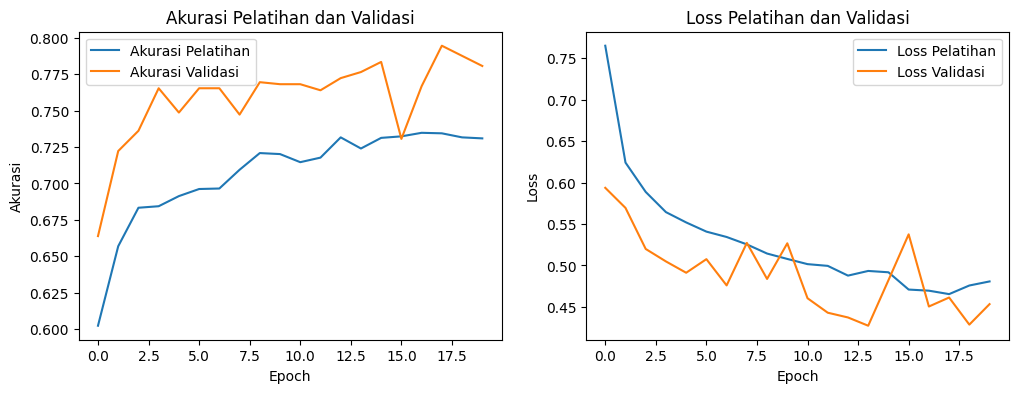

10/10 [==============================] - 3s 332ms/step


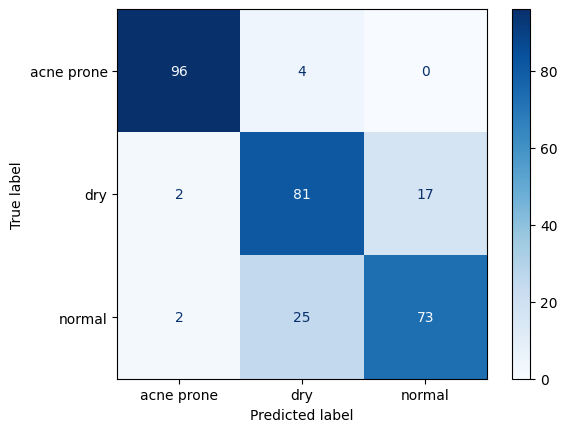

In [7]:
# Plotting akurasi dan loss selama pelatihan
plt.figure(figsize=(12, 4))

# Plot akurasi pelatihan
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss pelatihan
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Membuat Confusion Matrix
# Prediksi pada data pengujian
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

## **Convert Model**

In [8]:
model.save('skinenthusiast_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# Install TensorFlow.js Converter
!pip install tensorflowjs

# Convert model Keras ke TF.js
!tensorflowjs_converter --input_format keras skinenthusiast_model.h5 skinenthusiast_model_tfjs

# Buat ZIP dari direktori hasil konversi
import shutil
shutil.make_archive('skinenthusiast_model_tfjs', 'zip', 'skinenthusiast_model_tfjs')

# Download file ZIP
from google.colab import files
files.download('skinenthusiast_model_tfjs.zip')

2024-06-18 01:44:53.432972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>